<a href="https://colab.research.google.com/github/sanabriadiego/iris-practice/blob/main/iris_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.

In [5]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [6]:
df = pd.read_csv('iris.data', names=cols)

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
d = {'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2}
df['Species'] = df['Species'].map(d)

In [9]:
df['Species'].unique()

array([0, 1, 2])

In [ ]:
import seaborn as sns
for label in cols[:-1]:
  plt.figure(figsize=(8,5))
  # Add title
  plt.title(label)
  sns.scatterplot(x=df['Species'], y=df[label])



<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

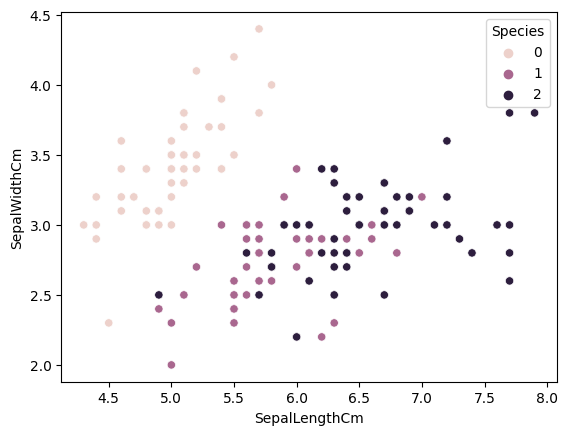

In [14]:
sns.scatterplot(x=df['SepalLengthCm'], y=df['SepalWidthCm'], hue=df['Species'])

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

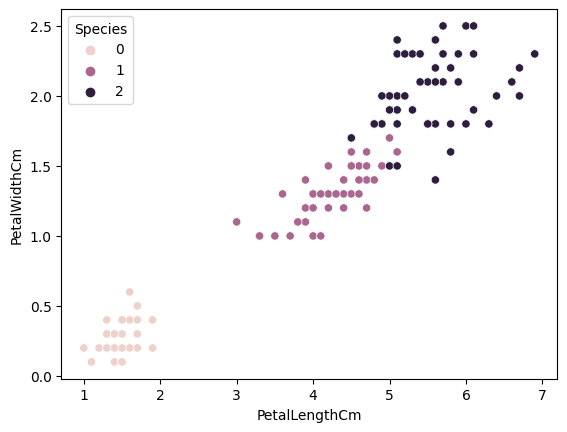

In [15]:
sns.scatterplot(x=df['PetalLengthCm'], y=df['PetalWidthCm'], hue=df['Species'])

Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

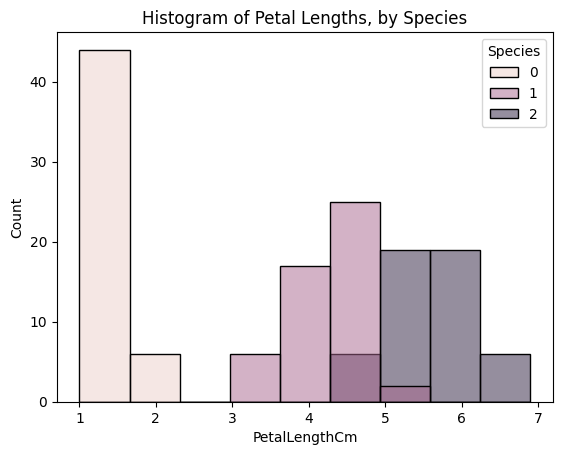

In [16]:
# Histograms for each species
sns.histplot(data=df, x='PetalLengthCm', hue='Species')
# Add title
plt.title("Histogram of Petal Lengths, by Species")

In [ ]:
list(df.columns)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['Species'] == 0][label], color='green', label='Iris-setosa', alpha=0.7, density=True)
  plt.hist(df[df['Species'] == 1][label], color='red', label='Iris-versicolor', alpha=0.7, density=True)
  plt.hist(df[df['Species'] == 2][label], color='blue', label='Iris-virginica', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
x = df[cols[:-1]]
y = df[cols[-1]]

In [ ]:
x_values = x.values
y_values = y.values.reshape((-1,1))

In [ ]:
x_train, x_, y_train, y_ = train_test_split(x_values, y_values, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

In [ ]:
del x_, y_

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (90, 4)
the shape of the training set (target) is: (90, 1)

the shape of the cross validation set (input) is: (30, 4)
the shape of the cross validation set (target) is: (30, 1)

the shape of the test set (input) is: (30, 4)
the shape of the test set (target) is: (30, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
nn_model = Sequential([
    Dense(units = 25, activation='relu', name='L1'),
    Dense(units = 15, activation='relu', name='L2'),
    Dense(units = 3, activation='linear', name='L4')
])

In [ ]:
nn_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [ ]:
nn_model.fit(
    x_train,y_train,
    epochs=200
)

Epoch 1/200
3/3 [==============================] - 1s 5ms/step - loss: 2.2898
Epoch 2/200
3/3 [==============================] - 0s 4ms/step - loss: 1.9412
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 1.7226
Epoch 4/200
3/3 [==============================] - 0s 3ms/step - loss: 1.5955
Epoch 5/200
3/3 [==============================] - 0s 4ms/step - loss: 1.5001
Epoch 6/200
3/3 [==============================] - 0s 4ms/step - loss: 1.4222
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.3290
Epoch 8/200
3/3 [==============================] - 0s 4ms/step - loss: 1.2371
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 1.1452
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 1.0677
Epoch 11/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0045
Epoch 12/200
3/3 [==============================] - 0s 4ms/step - loss: 0.9433
Epoch 13/200
3/3 [==============================] - 0s 4ms/st

In [ ]:
p_preferred = nn_model.predict(x_cv)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

1/1 [==============================] - 0s 52ms/step
two example output vectors:
 [[-5.269887    0.8039818   0.3188489 ]
 [ 5.732586   -0.19595835 -7.6443443 ]]
largest value 6.2519298 smallest value -9.118288


In [ ]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.4229706e-03 6.1807841e-01 3.8049856e-01]
 [9.9734324e-01 2.6552824e-03 1.5463852e-06]]
largest value 0.9986911 smallest value 4.890453e-07


In [ ]:
predict_y = np.zeros(y_test.shape[0])
for i in range(predict_y.shape[0]):
    predict_y[i]= np.argmax(p_preferred[i])
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-5.269887   0.8039818  0.3188489], category: 1
[ 5.732586   -0.19595835 -7.6443443 ], category: 0
[-4.211106    1.1525159  -0.45927283], category: 1
[-7.635493  -1.1867366  3.828938 ], category: 2
[ 5.303394   -0.11625053 -7.144037  ], category: 0
[-6.9188075   0.45853788  1.2942107 ], category: 2
[-4.4265704   0.95152503 -0.1201769 ], category: 1
[-6.410226   -0.13457553  1.9677887 ], category: 2
[-4.090687   1.2499776 -0.6222815], category: 1
[-7.427483   -0.16301334  2.327698  ], category: 2
[-8.3687935  -0.53257185  3.1143074 ], category: 2
[ 5.2467957   0.06511934 -7.210523  ], category: 0
[-3.2864966  1.5139029 -1.2281992], category: 1
[-4.0892076   0.9190622  -0.15011236], category: 1
[-3.544576    1.3387651  -0.91849786], category: 1
[-6.652543e+00  1.416117e-03  1.821638e+00], category: 2
[-9.118288  -0.9634078  4.0172243], category: 2
[ 4.9667697   0.30460638 -6.923564  ], category: 0
[-4.195609   1.0874658 -0.3742079], category: 1
[-1.4468151  1.3770106 -2.427044 ], categor

In [ ]:
predict_y

array([1., 0., 1., 2., 0., 2., 1., 2., 1., 2., 2., 0., 1., 1., 1., 2., 2.,
       0., 1., 1., 1., 0., 0., 1., 0., 2., 0., 2., 2., 0.])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_cv, predict_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

